In [118]:
from pycocotools.coco import COCO
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd

dataDir = 'coco'
dataType = 'train2017'

train_data_path = '{}/{}'.format(dataDir,dataType)
annFile = '{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [119]:
# init annotation
coco = COCO(annFile)
ids = list(sorted(coco.imgs.keys()))

loading annotations into memory...
Done (t=29.14s)
creating index...
index created!


In [120]:
len(ids)

118287

In [121]:
cats = coco.loadCats(coco.getCatIds())
nms = [cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
appliance accessory animal indoor electronic vehicle sports person kitchen food outdoor furniture


In [122]:
catIds = coco.getCatIds(catNms=['dog','',''])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
print(imgIds)

[18]
[98304, 204800, 524291, 311301, 491525, 147471, 131087, 278550, 581654, 253981, 450590, 106525, 368676, 253988, 491556, 42, 385066, 229419, 499760, 106545, 516146, 548912, 417846, 122934, 294968, 90173, 368702, 344127, 581704, 74, 237643, 548946, 245842, 442450, 335955, 24664, 204889, 139355, 565341, 524382, 450653, 483425, 254050, 516194, 434275, 57445, 540774, 442468, 548964, 450666, 109, 450672, 245873, 557174, 106616, 254074, 360570, 32892, 499837, 327805, 327804, 106624, 106621, 188546, 327810, 524420, 417926, 73864, 532617, 442506, 491660, 262286, 385168, 229522, 360595, 180373, 303253, 376984, 8350, 8351, 57503, 82081, 385186, 557219, 327845, 524453, 516261, 393384, 426151, 139429, 516265, 73906, 114869, 295097, 467130, 450747, 254138, 24762, 524476, 295103, 245953, 442565, 98503, 114891, 303314, 286932, 532693, 49370, 499930, 82142, 82144, 319714, 352482, 229603, 565479, 221416, 205035, 139500, 532718, 581873, 467187, 475380, 549109, 90359, 540922, 319738, 90366, 90367, 49

In [123]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [124]:
img_file_name = img['file_name']
img_path = os.path.join(train_data_path,img_file_name)

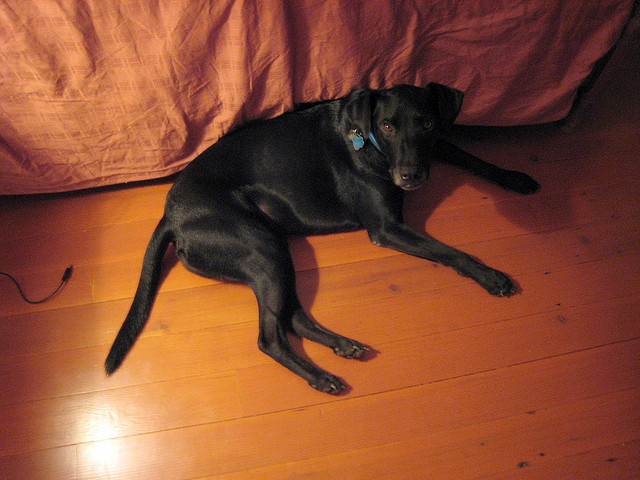

In [125]:
Image.open(img_path)

In [128]:
annIds = coco.getAnnIds(imgIds = img['id'],catIds = catIds,iscrowd=None)
ann = coco.loadAnns(annIds)

In [130]:
ann

[{'area': 51283.23790000001,
  'bbox': [101.97, 81.55, 440.76, 313.89],
  'category_id': 18,
  'id': 9116,
  'image_id': 422301,
  'iscrowd': 0,
  'segmentation': [[210.42,
    145.45,
    232.73,
    130.91,
    259.88,
    119.27,
    283.15,
    113.45,
    320.0,
    105.7,
    347.15,
    96.97,
    369.45,
    87.27,
    383.03,
    90.18,
    400.07,
    84.75,
    424.38,
    88.59,
    432.7,
    81.55,
    464.68,
    90.51,
    464.68,
    100.11,
    458.93,
    113.54,
    446.13,
    126.34,
    437.81,
    134.65,
    448.69,
    140.41,
    493.47,
    165.36,
    520.98,
    172.4,
    542.73,
    186.47,
    535.06,
    193.51,
    526.74,
    195.43,
    512.03,
    191.59,
    499.23,
    183.27,
    464.68,
    171.76,
    437.17,
    161.52,
    432.06,
    160.88,
    431.42,
    173.68,
    428.86,
    180.72,
    423.74,
    186.47,
    411.58,
    191.59,
    405.83,
    192.23,
    403.91,
    218.46,
    406.46,
    221.66,
    462.76,
    252.37,
    481.32

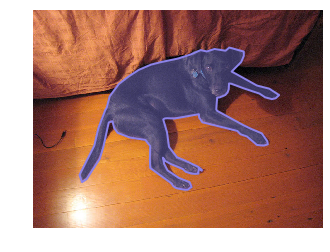

In [129]:
%matplotlib inline
plt.imshow(plt.imread(img_path)); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [73]:
print(nms)

counter = {}

for i,c in enumerate(nms):
    catIds = coco.getCatIds(catNms=[c])
    counter[c] = len(coco.getImgIds(catIds=catIds))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [100]:
df = pd.DataFrame(counter.values(),index=counter.keys(),columns=['num'])

print(df)

                  num
umbrella         3968
person          64115
sandwich         2365
car             12251
giraffe          2546
wine glass       2533
spoon            3529
elephant         2143
surfboard        3486
suitcase         2402
vase             3593
apple            1586
couch            4423
donut            1523
parking meter     705
dog              4385
bear              960
bowl             7111
cup              9189
tv               4561
skis             3082
frisbee          2184
skateboard       3476
sports ball      4262
tennis racket    3394
remote           3076
oven             2877
toaster           217
train            3588
cow              1968
...               ...
cat              4114
traffic light    4139
hair drier        189
bird             3237
banana           2243
zebra            1916
microwave        1547
knife            4326
scissors          947
baseball glove   2629
bottle           8501
toothbrush       1007
hot dog          1222
sheep     

In [108]:
print('total image num : ',df['num'].sum())

total image :  342996


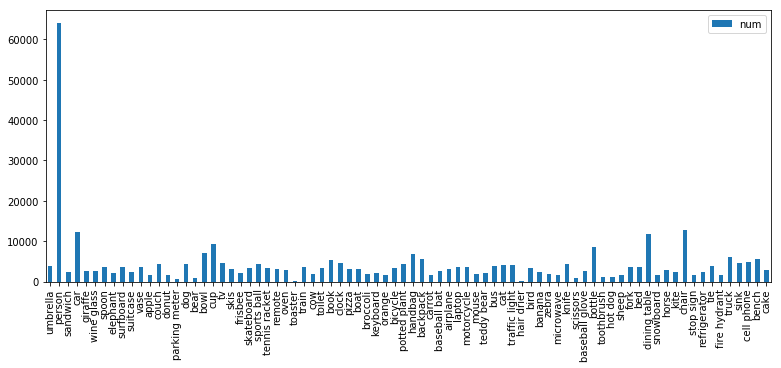

In [131]:
df.plot(kind='bar',figsize=(13,5))